In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import json
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [3]:
n_epochs = 20

In [4]:
acc_files = glob('nn_*_accuracies.npy')
trials = [f.split('_accuracies.npy')[0] for f in acc_files]

traces = np.zeros((len(trials), n_epochs))
for i, f in enumerate(acc_files):
    traces[i, :] = np.load(f) 

In [5]:
def read_hyper(trial_name):

    with open(trial_name + '_hyper.json') as f:
        hyper_dict = json.loads(f.readlines()[0])
        
    return hyper_dict

In [22]:
df = pd.DataFrame({tr: read_hyper(tr) for tr in trials}).T
df['max_acc'] = [t.max() for t in traces]

df

,conv_layers,fc_layers,mean,stddev,max_acc
nn_2018-01-24_142954,"[[28, 28, 6], [10, 10, 16]]","[120, 84, 43]",0,0.1,0.951927
nn_2018-01-24_143153,"[[28, 28, 7], [10, 10, 17]]","[120, 84, 43]",0,0.1,0.958957
nn_2018-01-24_143255,"[[28, 28, 8], [10, 10, 18]]","[120, 84, 43]",0,0.1,0.961678
nn_2018-01-24_143400,"[[28, 28, 9], [10, 10, 19]]","[120, 84, 43]",0,0.1,0.962585
nn_2018-01-24_143511,"[[28, 28, 10], [10, 10, 20]]","[120, 84, 43]",0,0.1,0.945578


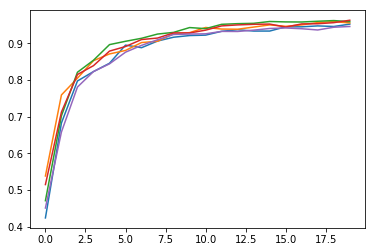

In [21]:
plt.figure()
for i in range(len(traces)):
    plt.plot(traces[i, :])